# Project: Investigate a Dataset - [No-Show Appoinments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
>I will be analysing a dataset **“No-show appointment”**. The data set contains records of 100k medical appointments in Brazil.
<li>'Patientid' containing the IDs of the patient.</li>
<li>'Neighbourhood' is represnts the location of the patient.</li>
<li>'Scholarship' indicates if a patiend's fee is being taken care of by the hospital.</li>
<li>'SMS_received' tells whether the patient received a reminder via text.</li>
<li>'No-show tells' if the patient showed up.</li>


During the course of my analysis, I will be breaking down the factors that influence the turn up of patient for their respective appointment.

### Question(s) for Analysis
>QUESTION 1:will the sms received together with the scholarship influence patient's decision to show up?

>QUESTION 2:Does gender affect the possibility of a patient showing up ?

>QUESTION 3:Is receiving SMS reminder a factor to be considered for the patients not showing up ?

>QUESTION 4:Is the age a factor to consider for the non turn-up of the patients?


 

So I will start by importing the necessary libraries needed for this investigation

In [445]:
#import nessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In [446]:
# reading my dataset
df_nsp = pd.read_csv('noshowappointments.csv')
df_nsp.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From the above cell, I read my dataset using pandas and went ahead to view the first 5 data. I gave it a name "df_nsp"

In [447]:
#dimension of my dataset
df_nsp.shape

(110527, 14)

In [448]:
# identify missing values
df_nsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [449]:
#statistics of my data
df_nsp.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [450]:
#checking for null values
df_nsp.isnull().count()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
No-show           110527
dtype: int64


### Data Cleaning

In [451]:
df_nsp.duplicated().sum()

0

#### DROPPING DUPLICATES

In [452]:
#dropping duplicate
df_nsp.drop_duplicates(inplace= True)

### MAKING ALL THE COLUMNS LOWERCASE

In [453]:
# THE LAMBDA ALLOWS ME TO DO THIS AT ONCE TO ALL MY COLUMNS
df_nsp.rename(columns=lambda x:x.lower(), inplace=True)

### RENAMING MY COLUMNS USING A COVENTIONAL AND CONVENIENT APPROACH

In [454]:
#rename my columns
df_nsp.columns=['patient_id','appointment_id','gender','scheduled_day','appointment_day','age','neighbourhood','scholarship','hypertension','diabetes','alcoholism','handicap','sms_received','no_show']

### DROPPING COLUMNS NOT FOCUSED ON FOR MY ANALYSIS USING THE 'DROP' FUNCTION

In [455]:
#dropping uncessary columns 
df_nsp.drop(['patient_id','appointment_id','scheduled_day','appointment_day','neighbourhood'], axis=1, inplace=True)
df_nsp.head(1)

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,No


In [456]:
#USING THE DESCRIBE FUNCTION TO GET THE MEAN, MAX AND MIN AGE OF THE PATIENT 
df_nsp.age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

###  age_group list will be used to cut the column(age) into four groups

In [457]:
#creating a list
age_group= [-1,18,36, 70, 115]

### Labels for the four age_groups

In [458]:
# creating a list for the four age_groups name
age_names = ['children', 'adults', 'elderly', 'grand_parent'] # Name each age group level

### Created and added a new column(age_group) to the dataset, which groups the age of the patient to children, adults, elderly and grand_parent

In [459]:
# Creates age_group column
df_nsp['age_group'] = pd.cut(df_nsp['age'], age_group, labels=age_names)

# Checks for successful creation of this column
df_nsp.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,F,62,0,1,0,0,0,0,No,elderly
1,M,56,0,0,0,0,0,0,No,elderly
2,F,62,0,0,0,0,0,0,No,elderly
3,F,8,0,0,0,0,0,0,No,children
4,F,56,0,1,1,0,0,0,No,elderly


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (will the sms received together with the scholarship influence patient's decision to show up?)

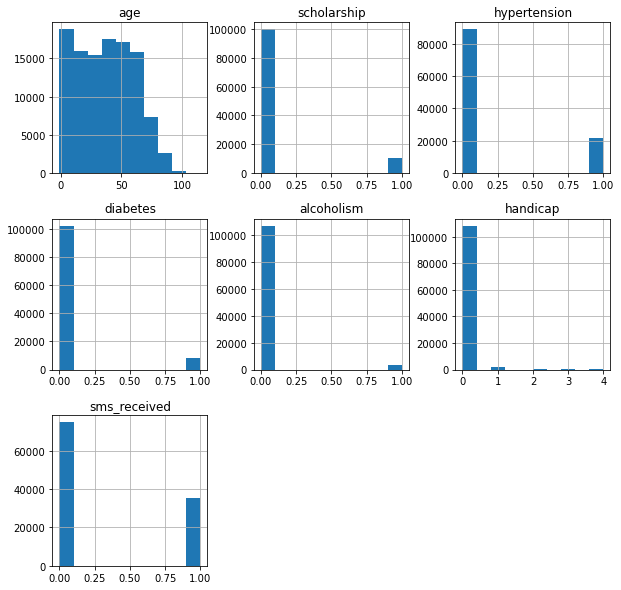

In [460]:
#visulalizing each data
df_nsp.hist(figsize=(10,10));


In [461]:
#comparing sms_received and scholarship column to no_show column
df_grouped =df_nsp.groupby(['sms_received','scholarship'])['no_show'].count()
df_grouped

sms_received  scholarship
0             0              67689
              1               7356
1             0              31977
              1               3505
Name: no_show, dtype: int64

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN SMS/SCHOLARSHIP AND NO SHOW')

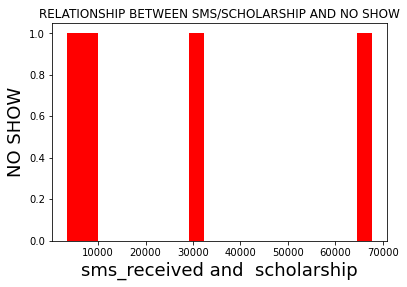

In [462]:
plt.hist(df_grouped, stacked=True, bins=20, color='red',)
plt.xlabel('sms_received and  scholarship', fontsize=18)
plt.ylabel('NO SHOW', fontsize=18)
plt.title('RELATIONSHIP BETWEEN SMS/SCHOLARSHIP AND NO SHOW')

### From the result above, the patients without scholarship and did not receive the sms show up the most. Followed by the people that received sms but without scholarship.

### Research Question 2 (Does gender affect the possibility of a patient showing up?)

In [463]:
gender_chart= df_nsp.groupby(['gender'])['no_show'].count()
gender_chart

gender
F    71840
M    38687
Name: no_show, dtype: int64

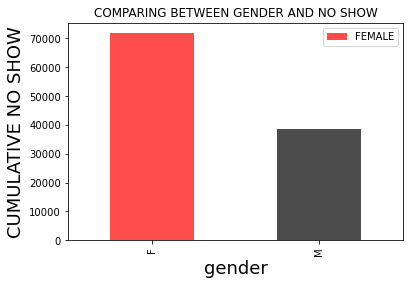

In [464]:
#visualising the relationship between gender and the no_show column using bar chart
gender_chart.plot(kind='bar', title='COMPARING BETWEEN GENDER AND NO SHOW', color=['red','black'], alpha=.7);
plt.xlabel('gender', fontsize=18)
plt.ylabel('CUMULATIVE NO SHOW', fontsize=18)
plt.legend(['FEMALE','MALE'])

#### Firstly I compared the numbers of male/female that showed up for the appoinment and went ahead to plot a bar chart. From the bar chart shown above, it is evident that the females showed up for the appoinment compared to the males. But we can't conclude if gender is a factor , there is a posibility that the reason more woman showed up is because there were more women in the sample population

In [465]:
#comparing sms_received and gender column to no_show column
df_grouped =df_nsp.groupby(['sms_received','gender'])['no_show'].count()
df_grouped

sms_received  gender
0             F         47638
              M         27407
1             F         24202
              M         11280
Name: no_show, dtype: int64

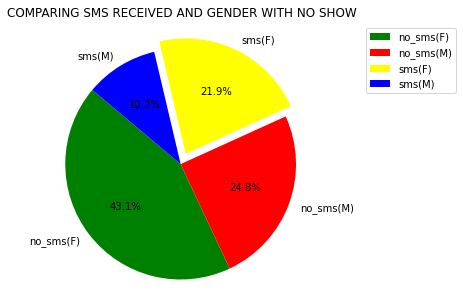

In [466]:
labels = ['no_sms(F)', 'no_sms(M)', 'sms(F)', 'sms(M)']
colors = ['green', 'red', 'yellow', 'blue']
explode = (0, 0, 0.1, 0)

plt.pie(df_grouped, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%',startangle=140)

plt.title('COMPARING SMS RECEIVED AND GENDER WITH NO SHOW')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);
plt.legend(['no_sms(F)', 'no_sms(M)', 'sms(F)', 'sms(M)'],bbox_to_anchor=(1, 0, 0.5, 1))

###  The pie chart above which dipicts the comparism between the gender and patients that received sms to the turn-up of their appoinment.

### Research Question 3  ( is receiving SMS reminder a factor to be considered for the patients not showing up ?)

In [467]:
#visualising the relationship between sms_received and the no_show column using bar chart
sms_chart= df_nsp.groupby(['sms_received'])['no_show'].count()
sms_chart

sms_received
0    75045
1    35482
Name: no_show, dtype: int64

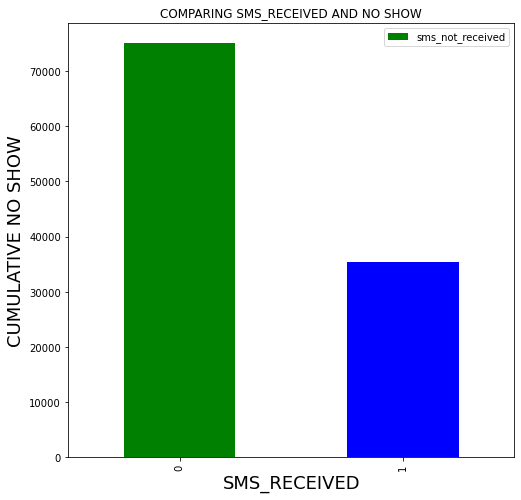

In [468]:
sms_chart.plot(kind='bar',figsize=(8,8), title='COMPARING SMS_RECEIVED AND NO SHOW', color=['GREEN','BLUE']);
plt.xlabel('SMS_RECEIVED', fontsize=18)
plt.ylabel('CUMULATIVE NO SHOW', fontsize=18)
plt.legend(["sms_not_received","sms_received"])

### As we can see from the bar chart, that the people who didn't receive any SMS showed up more than the ones that received. so, I do not think sms_received should be a factor considered

### QUESTION 4:Is the age a factor to consider for the non turn-up of the patients?

Text(0.5, 1.0, 'AGE GROUPS THAT SHOWED UP FOR THEIR APPOINTMENT')

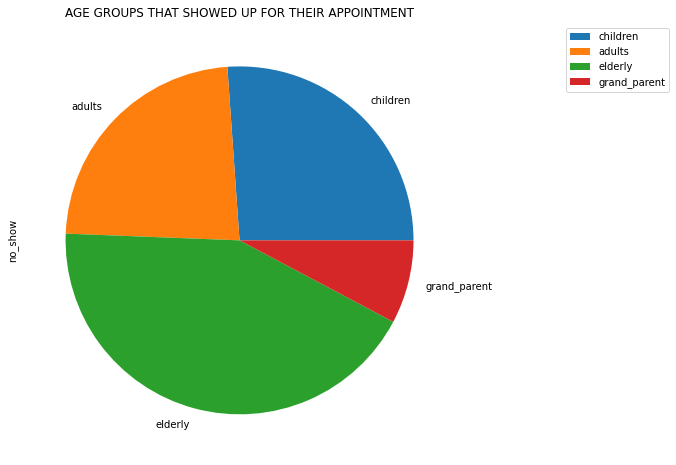

In [469]:
#visualising the relationship between age_group and the no_show column using pie chart
df_nsp.groupby(['age_group'])['no_show'].count().plot(kind='pie',figsize=(8,8))
plt.legend(['children', 'adults', 'elderly', 'grand_parent'],bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("AGE GROUPS THAT SHOWED UP FOR THEIR APPOINTMENT")

### From the pie chart above, the elders took their appoinment more seriously, followed by the children, adults and grandparent

<a id='conclusions'></a>
## Conclusions

#### Results:
From the analysis above, the results are:

1. There is high tendency that females will show up for their appoinment compared to the males.
2. Sms reminder is not a factor to be considered because it made no sense that people who didnt rceive any reminder showed up more.
3. There is the possibility that the elderly ones took their health seriouly, showed up more age-wise.
4. Scholarship does not influence people decision to show up, because patients without scholarships showed up more.

#### Limitations:

1. There were some illogical data such as patients with age 0 and -1

2. we can not infer that there is a stong correlation between the columns

3. No enough reason or facts to draw a conclusion on the females showing up more than the males because we have more female in the dataset than males.

4. No enough reason or facts to draw a conclusion from this analysis because the dataset is descriptive and possibly not a large population experiment.

